In [2]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from collections import defaultdict
from itertools import combinations
from collections import deque, defaultdict
from itertools import chain
from itertools import islice
import time
import matplotlib.pyplot as plt
import heapq
from operator import itemgetter

In [3]:
df = pd.read_csv("vk.csv", delimiter=',')

In [28]:
df_test = pd.read_csv("test.txt", delimiter='\t')

In [29]:
df_astro = pd.read_csv("astro.txt", delimiter='\t')

In [33]:
df_google = pd.read_csv("google.txt", delimiter='\t')

In [4]:
df.head()
df.shape

(14847753, 4)

## Число вершин

In [48]:
edges_astro = len(set([*df_astro["u"].unique(), *df_astro["v"].unique()]))
print(edges_astro)

3103653


In [49]:
edges_google = len(set([*df_google["u"].unique(), *df_google["v"].unique()]))
print(edges_google)

3103653


In [50]:
edges_vk = len(set([*df["u"].unique(), *df["v"].unique()]))
print(edges_vk)

3103653


## Число всех ребер

In [51]:
print(f'Число ребер в графе: {len(df["u"])}')

Число ребер в графе: 14847753


In [52]:
print(f'Теоретически возможное число ребер в данном графе: {edges_astro*(edges_astro-1)/2}')

Теоретически возможное число ребер в данном графе: 176184606.0


In [53]:
print(f'Теоретически возможное число ребер в данном графе: {edges_google*(edges_google-1)/2}')

Теоретически возможное число ребер в данном графе: 383436191328.0


In [54]:
print(f'Теоретически возможное число ребер в данном графе: {edges_vk*(edges_vk-1)/2}')

Теоретически возможное число ребер в данном графе: 4816329420378.0


## Число уникальных ребер

In [15]:
# unique_edges = len(np.unique(df[['u', 'v', 't', 'h']].values, axis=0))
unique_edges = np.unique(df[['u', 'v']].values, axis=0)
print(f'Число уникальных ребер: {len(unique_edges)}')

Число уникальных ребер: 14847753


## Плотность графа
Для неориентированного простого графа плотность графа с числом вершин V  определяется как отношение числа его рёбер E к числу рёбер полного графа

In [16]:
density_astro = 2*len()/((vertices*(vertices-1)))
print(f'Плотность: {density}')

Плотность: 3.0827943240715257e-06


In [ ]:
density_astro = 2*len(unique_edges)/((vertices*(vertices-1)))
print(f'Плотность: {density}')

In [ ]:
density_astro = 2*len(unique_edges)/((vertices*(vertices-1)))
print(f'Плотность: {density}')

## Компоненты слабой связности

In [55]:
class Node:
    def __init__(self, key):
        self.key = key
        self.parent = self
        self.size = 1

class UnionFind(dict):
    def find(self, key):
        node = self.get(key, None)
        if node is None:
            node = self[key] = Node(key)
        else:
            while node.parent != node: 
                # walk up & perform path compression
                node.parent, node = node.parent.parent, node.parent
        return node

    def union(self, key_a, key_b):
        node_a = self.find(key_a)
        node_b = self.find(key_b)
        if node_a != node_b:  # disjoint? -> join!
            if node_a.size < node_b.size:
                node_a.parent = node_b
                node_b.size += node_a.size
            else:
                node_b.parent = node_a
                node_a.size += node_b.size

In [56]:
def find_components(line_iterator):
    forest = UnionFind()

    for line in line_iterator:
        forest.union(line[0], line[1])

    result = defaultdict(list)
    for key in forest.keys():
        root = forest.find(key)
        result[root.key].append(key)

    return list(result.values())

In [61]:
graph_edges_vk = [edge for edge in df[["u","v"]].values]

In [62]:
start_time = time.time()
graph_components_vk = find_components(graph_edges_vk)
print(f"--- {(time.time() - start_time)} seconds ---")

--- 40.95025897026062 seconds ---


In [63]:
print(len(graph_components_vk))

28175


In [27]:
# nodes_test = set([*df_test["u"].unique(), *df_test["v"].unique()])
graph_edges_test = [edge for edge in df_test.values]
print(graph_edges_test)
start_time = time.time()
graph_components_test = find_components(graph_edges_test)
print(f"--- {(time.time() - start_time)} seconds ---")
print(graph_components_test)
print(len(graph_components_test))

[array([1, 2]), array([2, 3]), array([3, 1]), array([1, 4]), array([4, 5]), array([5, 1]), array([5, 6]), array([6, 7]), array([7, 8]), array([10, 11]), array([11, 13]), array([13, 10]), array([68, 19]), array([999,   9])]
--- 0.00013017654418945312 seconds ---
[[1, 2, 3, 4, 5, 6, 7, 8], [10, 11, 13], [68, 19], [999, 9]]
4


In [77]:
df_astro = pd.read_csv("astro.txt", delimiter='\t')
nodes_astro = set([*df_astro["u"].unique(), *df_astro["v"].unique()])
graph_edges_astro = [edge for edge in df_astro.values]
# print(graph_edges_astro)
start_time = time.time()
graph_components_astro = find_components(graph_edges_astro)
print(f"--- {(time.time() - start_time)} seconds ---")
print(len(graph_components_astro))

--- 0.41098809242248535 seconds ---
290


In [66]:
# df_google = pd.read_csv("google.txt", delimiter='\t')
nodes_google = set([*df_google["u"].unique(), *df_google["v"].unique()])
graph_edges_google = [edge for edge in df_google.values]
# print(graph_edges_google)
start_time = time.time()
graph_components_google = find_components(graph_edges_google)
print(f"--- {(time.time() - start_time)} seconds ---")
print(graph_components_google)

KeyboardInterrupt: 

In [ ]:
# df_google = pd.read_csv("google.txt", delimiter='\t')
nodes_vk = set([*df_vk["u"].unique(), *df_vk["v"].unique()])
graph_edges_vk = [edge for edge in df_vk.values]
# print(graph_edges_google)
start_time = time.time()
graph_components_vk = find_components(graph_edges_vk)
print(f"--- {(time.time() - start_time)} seconds ---")
print(len(graph_components_vk))

In [71]:
print(f'Число компонент слабой связности: {len(graph_components_test)}')

max_component_test = max(graph_components_test, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_test)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_test)/len(nodes_test)}')

Число компонент слабой связности: 4
Число вершин в максимальной компоненте связности: 8


NameError: name 'nodes_test' is not defined

In [78]:
print(f'Число компонент слабой связности: {len(graph_components_astro)}')

max_component_astro = max(graph_components_astro, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_astro)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_astro)/len(nodes_astro)}')

Число компонент слабой связности: 290
Число вершин в максимальной компоненте связности: 17903
Доля вершин в максимальной по мощности компоненте слабой связности: 0.9537076496910292


In [73]:
print(f'Число компонент слабой связности: {len(graph_components_google)}')

max_component_google = max(graph_components_google , key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_google)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_google)/len(nodes_google)}')

NameError: name 'graph_components_google' is not defined

In [79]:
print(f'Число компонент слабой связности: {len(graph_components_vk)}')

max_component_vk = max(graph_components_vk, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_vk)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_vk)/vertices}')

Число компонент слабой связности: 28175
Число вершин в максимальной компоненте связности: 3041820
Доля вершин в максимальной по мощности компоненте слабой связности: 0.9800773475643056


## Радиус и диаметр наибольшей компоненты слабой связности

Эксцентриситет вершины - расстояние от нее до самой удаленной.  
Диаметр графа - максимальное расстояние между любыми двумя вершинами, то есть наибольший эксцентриситет.  
Радиус графа - наименьший эксцентриситет.

In [18]:
def binary_search(lys, val):
    first = 0
    last = len(lys)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if lys[mid] == val:
            index = mid
        else:
            if val<lys[mid]:
                last = mid -1
            else:
                first = mid +1
    if index == -1:
        return False
    return index

test = [1,2,3,4]
if binary_search(test,7):
    print(1)

In [20]:
diameter = 0
radius = float("inf")

random_edges_max_component = []

i=0
for value in df.values[30000:]:
    if value[0] in max_component and value[1] in max_component:
#         print(i)
        i+=1
        diameter = max(diameter, value[3])
#         print(f"Diameter: {diameter}")
#         print(f"Radius: {radius}")
        radius = min(radius, value[3])
        if i==500:
            break

print(random_edges_max_component)

print(f"Diameter: {diameter}")
print(f"Radius: {radius}")

[]
Diameter: 9.0
Radius: 0.0


## Загрузка графов

In [84]:
def load_graph(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    i = 0
    while True:
        line = f.readline().strip(',')
        if line.startswith("#"):
            continue

        if not line:
            break
        
        node_from, node_to = map(int, line.split(',')[:2])

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph


def load_graph_by_whitespace(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    f.readline()
    while True:
        line = f.readline().strip()
        if not line:
            break
        if line.startswith("#"):
            continue
        node_from, node_to = map(int, line.split())

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph


def load_graph_by_whitespace_vk(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    f.readline()
    while True:
        line = f.readline().strip(',')
        if not line:
            break
        if line.startswith("#"):
            continue
        node_from, node_to = map(int, line.split(',')[:2])

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph

In [85]:
start_time = time.time()
graph_nodes_degrees_vk = load_graph_by_whitespace_vk("/Users/antonkondrahin/PycharmProjects/FiniteGraphs/vk.csv")
# print(print_cliques(df_test[["u","v"]].values, 3, graph_nodes_degrees_test))
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/PycharmProjects/FiniteGraphs/vk.csv
--- 50.360390186309814 seconds ---


In [94]:
start_time = time.time()
df_test = pd.read_csv("test.txt", delimiter='\t')
graph_nodes_degrees_test = load_graph_by_whitespace("/Users/antonkondrahin/PycharmProjects/FiniteGraphs/test.txt")
# print(print_cliques(df_test[["u","v"]].values, 3, graph_nodes_degrees_test))
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/PycharmProjects/FiniteGraphs/test.txt
--- 0.0033769607543945312 seconds ---


In [87]:
start_time = time.time()
df_astro = pd.read_csv("astro.txt", delimiter='\t')
graph_nodes_degrees_astro = load_graph_by_whitespace("/Users/antonkondrahin/PycharmProjects/FiniteGraphs/astro.txt")
# print_cliques(df_astro[["u","v"]].values, 3, graph_nodes_degrees_astro)
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/PycharmProjects/FiniteGraphs/astro.txt
--- 0.7050869464874268 seconds ---


In [88]:
start_time = time.time()
graph_nodes_degrees_google = load_graph_by_whitespace("/Users/antonkondrahin/PycharmProjects/FiniteGraphs/google.txt")
# print_cliques(df_astro[["u","v"]].values, 3, graph_nodes_degrees_astro)
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/PycharmProjects/FiniteGraphs/google.txt
--- 11.697863817214966 seconds ---


## Локальный кластерный коэффициент вершины

### Число треугольников (клик размера 3)

In [95]:
def enumerate_all_cliques(G):
    """Returns all cliques in an undirected graph.

    This function returns an iterator over cliques, each of which is a
    list of nodes. The iteration is ordered by cardinality of the
    cliques: first all cliques of size one, then all cliques of size
    two, etc.

    Returns
    -------
    iterator
        An iterator over cliques, each of which is a list of nodes in
        `G`. The cliques are ordered according to size.

    Notes
    -----
    To obtain a list of all cliques, use
    `list(enumerate_all_cliques(G))`. However, be aware that in the
    worst-case, the length of this list can be exponential in the number
    of nodes in the graph (for example, when the graph is the complete
    graph). This function avoids storing all cliques in memory by only
    keeping current candidate node lists in memory during its search.
    """
#     print(f'G: {G}')
    index = {}
    nbrs = {}
    for node in G:
        index[node] = len(index)
        # Neighbors of u that appear after u in the iteration order of G.
        nbrs[node] = {v for v in G[node] if v not in index}
#     print(f'index: {index}\n')
#     print(f'nbrs: {nbrs}\n')
    queue = deque(([node], sorted(nbrs[node], key=index.get)) for node in G)
    # Loop invariants:
    # 1. len(base) is nondecreasing.
    # 2. (base + cnbrs) is sorted with respect to the iteration order of G.
    # 3. cnbrs is a set of common neighbors of nodes in base.
#     print(f'queue: {queue} \n')
    while queue:
#         print(f'queue.popleft(): {queue.popleft()}')
#         base, cnbrs = map(list, queue.popleft())
        base, cnbrs = queue.popleft()
        base, cnbrs = list(base), list(cnbrs)
#         print(f'base: {base} \n')
#         print(f'cnbrs: {cnbrs} \n')
        yield base
        for i, node in enumerate(cnbrs):
            # Use generators to reduce memory consumption.
            queue.append(
                (
                    chain(base, [node]),
                    filter(nbrs[node].__contains__, islice(cnbrs, i + 1, None)),
                )
            )
            
def count_k_cliques(G, k, vertice_clique):
    k_cliques_count = 0
    for clique in enumerate_all_cliques(G): 
        if len(clique) > k: 
            break
        elif len(clique) == k:
            for vertice in clique:
                vertice_clique[vertice].add(frozenset(clique))  # change to number of cliques
            k_cliques_count += 1
    return k_cliques_count, vertice_clique

In [98]:
start_time = time.time()
print(graph_nodes_degrees_test)
vertice_clique_test = defaultdict(set)
graph_cliques_number_test, graph_cliques_by_node_test = count_k_cliques(graph_nodes_degrees_test, 3, vertice_clique_test)
print(graph_cliques_number_test)
print(graph_cliques_by_node_test)
print(f"--- {(time.time() - start_time)} seconds ---")

{1: {2, 3, 4, 5}, 2: {1, 3}, 3: {1, 2}, 4: {1, 5}, 5: {1, 4, 6}, 6: {5, 7}, 7: {8, 6}, 8: {7}, 10: {11, 13}, 11: {10, 13}, 13: {10, 11}, 68: {19}, 19: {68}, 999: {9}, 9: {999}}
3
defaultdict(<class 'set'>, {1: {frozenset({1, 2, 3}), frozenset({1, 4, 5})}, 2: {frozenset({1, 2, 3})}, 3: {frozenset({1, 2, 3})}, 4: {frozenset({1, 4, 5})}, 5: {frozenset({1, 4, 5})}, 10: {frozenset({10, 11, 13})}, 11: {frozenset({10, 11, 13})}, 13: {frozenset({10, 11, 13})}})
--- 0.0007979869842529297 seconds ---


In [92]:
start_time = time.time()
vertice_clique = defaultdict(set)
graph_cliques_number, graph_cliques_by_node = count_k_cliques(graph_nodes_degrees_astro, 3, vertice_clique)
print(graph_cliques_number)
print(f"--- {(time.time() - start_time)} seconds ---")

1351441
--- 352.8934910297394 seconds ---


In [80]:
start_time = time.time()
vertice_clique = defaultdict(set)
graph_cliques_number, graph_cliques_by_node = count_k_cliques(graph_nodes_degrees_google, 3, vertice_clique)
print(graph_cliques_number)
print(f"--- {(time.time() - start_time)} seconds ---")

NameError: name 'count_k_cliques' is not defined

In [218]:
start_time = time.time()
vertice_clique_vk = defaultdict(set)
graph_cliques_number_vk, graph_cliques_by_node_vk = count_k_cliques(graph_nodes_degrees_vk, 3, vertice_clique_vk)
print("---------------")
print(graph_cliques_number_vk)
# print(graph_cliques_by_node_test)
print(f"--- {(time.time() - start_time)} seconds ---")

NameError: name 'graph_nodes_degrees_vk' is not defined

### Локальные коэффициенты

Если кратко, то локальный коэффициент - это отношение числа треугольников, где есть искомая вершина, к степени вершины. Подробнее туть
https://translated.turbopages.org/proxy_u/en-ru.ru.7d7cd3c3-627e6c61-479fa8f8-74722d776562/https/en.wikipedia.org/wiki/Clustering_coefficient

In [30]:
start_time = time.time()
local_coeffs_test = defaultdict(int)
for node, cliques in graph_cliques_by_node_test.items():
    node_degree = len(graph_nodes_degrees_test.get(node, []))
    if node_degree>=2:
        local_coeffs_test[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs_test[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.0001862049102783203 seconds ---


In [99]:
start_time = time.time()
local_coeffs = defaultdict(int)
for node, cliques in graph_cliques_by_node.items():
    node_degree = len(graph_nodes_degrees_astro.get(node, []))
    if node_degree>=2:
        local_coeffs[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.0741569995880127 seconds ---


In [269]:
start_time = time.time()
local_coeffs = defaultdict(int)
for node, cliques in graph_cliques_by_node.items():
    node_degree = len(graph_nodes_degrees_google.get(node, []))
    if node_degree>=2:
        local_coeffs[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

NameError: name 'graph_cliques_by_node' is not defined

In [197]:
print(f'Локальные коэффициенты для вершин графа:\n {local_coeffs}')

Локальные коэффициенты для вершин графа: defaultdict(<class 'int'>, {84424: 0.07567567567567568, 276: 0.11612903225806452, 20113: 0.1164021164021164, 53681: 0.3484848484848485, 58458: 0.6666666666666666, 63552: 0.16164762893734858, 66200: 0.167816091954023, 97101: 0.13852813852813853, 130825: 0.1111111111111111, 1662: 0.24141749723145073, 33040: 0.0838703793774319, 76259: 0.18963922294172064, 5089: 1.0, 6058: 0.2292134831460674, 25452: 0.15367249858905105, 39521: 0.2012119851868477, 45009: 0.16401788785689714, 77098: 0.23114754098360657, 83560: 0.13243118204950266, 132445: 0.14411288457089985, 6229: 0.12427409988385599, 61571: 0.16010854816824965, 69839: 0.053410893707033315, 92387: 0.20915032679738563, 106611: 0.1583860283047275, 107829: 0.24079485680888368, 10639: 0.11878893234825438, 32432: 0.20317460317460317, 39238: 0.24242424242424243, 50220: 0.19047619047619047, 73543: 0.14692202462380302, 91060: 0.15324675324675324, 16442: 0.31494252873563217, 19325: 0.13084702907711757, 47968:

### Средний коэффициент

In [100]:
average_coeff = sum(local_coeffs.values())/len(graph_nodes_degrees_astro)
print(f'Средний кластерный коэффициент сети: {average_coeff}')

Средний кластерный коэффициент сети: 0.6303341692292374


### Глобальный коэффициент

In [101]:
def С(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0

In [102]:
start_time = time.time()
numerator = 0
denominator = 0
for node, local_coeff in local_coeffs.items():
    node_degree = len(graph_nodes_degrees_astro.get(node, []))
    c_n_k = С(node_degree, 2)
    denominator += c_n_k
    numerator += c_n_k*local_coeff

global_coeff = numerator/denominator
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.02675771713256836 seconds ---


In [103]:
print(f'Глобальный кластерный коэффициент: {global_coeff}')

Глобальный кластерный коэффициент: 0.3179284915494925


## B Для каждой из сетей исследовать, как меняется доля вершин в наибольшей компоненте слабой связности

случайным образом x% узлов

In [129]:
node_numbers_to_delete = [2, 4, 8]
nodes_test = set([*df_test["u"].unique(), *df_test["v"].unique()])
print(nodes_test)
nodes_to_delete_test = random.sample(list(nodes_test), k=node_number_to_delete)
print(nodes_to_delete_test)
max_component_test_after_delete = set(max_component_test) - set(nodes_to_delete_test)

{1, 2, 3, 4, 5, 6, 7, 68, 999, 10, 11, 8, 13, 9, 19}
[8, 68, 1, 10, 13]


[0.953601108033241, 0.9534945663754528, 0.9533347538887705, 0.9528553164287237, 0.9521095248242063, 0.950298316641807, 0.9496590666950778, 0.9472618793948434, 0.9434796505433625, 0.9407095674408694, 0.9377264010227999, 0.9308544640954614, 0.9271787769017686, 0.9233965480502877, 0.9173236735563606, 0.9119433198380567, 0.9075751118687406, 0.90171532069039, 0.8767845727679523, 0.8492968250585979, 0.8009801832516514, 0.775623268698061, 0.7446196462816962, 0.6996590666950778, 0.6482527168122736, 0.5974856168761986, 0.5369699552525037, 0.4971233752397187, 0.4469955252503729, 0.1216705731941189]


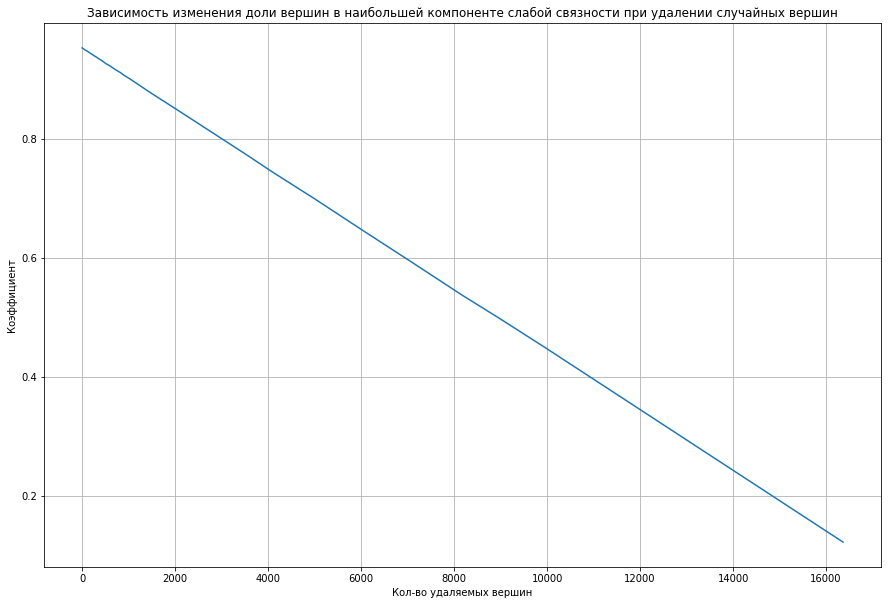

In [236]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364]
nodes_astro = set([*df_astro["u"].unique(), *df_astro["v"].unique()])
nodes_astro_len = len(nodes_astro)
node_proportions = []
for number in node_numbers_to_delete:
    nodes_to_delete_astro = random.sample(list(nodes_astro), k=number)
    proportion = len(set(max_component_astro) - set(nodes_to_delete_astro))/nodes_astro_len
    node_proportions.append(proportion)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Кол-во удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
plt.plot(node_numbers_to_delete, node_proportions)

[0.9772608149016858, 0.9772585310484143, 0.9772539633418711, 0.9772448279287849, 0.9772276990292482, 0.9771934412301747, 0.977176312330638, 0.9771203579254847, 0.97704042306098, 0.976983326729191, 0.9769113853511368, 0.9767572252553063, 0.9766898515837952, 0.9765950716730253, 0.976466033963182, 0.9763427058865176, 0.9762547775355624, 0.9761143205593613, 0.975583324673723, 0.9749735358502157, 0.97392753105184, 0.9733668450736714, 0.9727068114781898, 0.9716790775059866, 0.970590821422087, 0.969467165612478, 0.9681162664023487, 0.9672221378465319, 0.9661293140560892, 0.9590276723081649, 0.9549715488978695, 0.9437635389676755, 0.9325806514234687, 0.9214936857166675, 0.8991016463156308, 0.8768363607711659, 0.8656294927676077, 0.809842950829781, 0.7540541250386827, 0.6424856088695725, 0.5309593439859863, 0.41926864166684746]


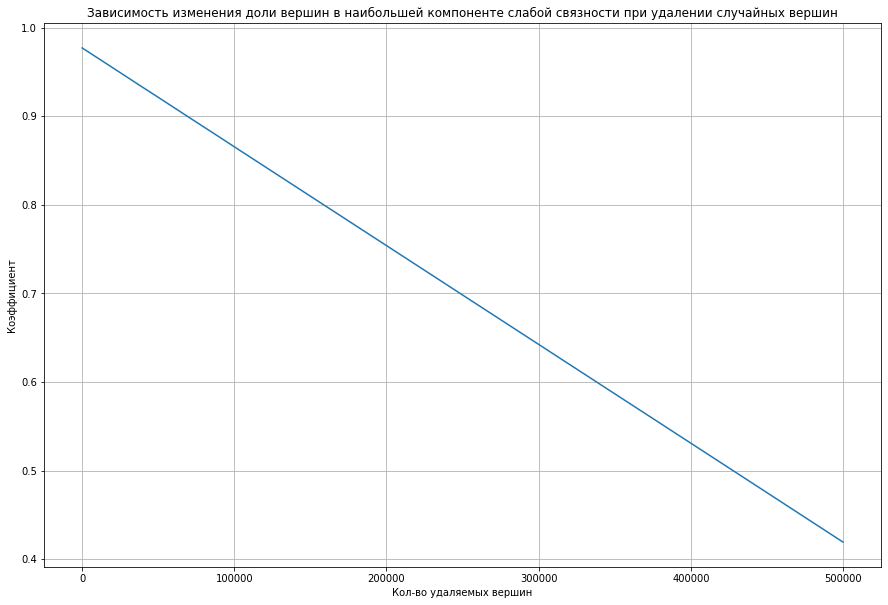

In [279]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 20000, 30000, 40000, 50000, 70000, 90000, 100000, 150000, 200000, 300000, 400000, 500000]
nodes_google = set([*df_google["u"].unique(), *df_google["v"].unique()])
nodes_google_len = len(nodes_google)
node_proportions = []
for number in node_numbers_to_delete:
    nodes_to_delete_google = random.sample(list(nodes_google), k=number)
    proportion = len(set(max_component_google) - set(nodes_to_delete_google))/nodes_google_len
    node_proportions.append(proportion)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Кол-во удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
plt.plot(node_numbers_to_delete, node_proportions)

[0.9800767031623703, 0.9800760587604349, 0.9800747699565641, 0.9800721923488225, 0.980067359334307, 0.9800580155062437, 0.9800531824917283, 0.980037394644311, 0.9800135517727014, 0.9799971195233488, 0.97997875406819, 0.9799355791385184, 0.9799162470804564, 0.979887893395299, 0.9798518068869168, 0.9798173313833731, 0.9797934885117634, 0.9797548243956395, 0.9796017789359829, 0.9794300458201997, 0.9791303989202401, 0.9789770312596157, 0.978786610487706, 0.9785066178467761, 0.9781805504674653, 0.9778709153375071, 0.9775016730285248, 0.9772423012495276, 0.9769194558798938, 0.9749134326550036, 0.9611319306636406, 0.9421936021842648, 0.9232133875790882, 0.9169143586605848, 0.9105715104104743, 0.9011374660762657, 0.8853241647825965, 0.8695301955469893, 0.8537652243984749, 0.8379364574583563, 0.8221927515737101, 0.8064348688464851, 0.7905139524296048, 0.7590606939628882, 0.7275130306126362, 0.6958129662046627, 0.6642640140505398, 0.6327389047680266]


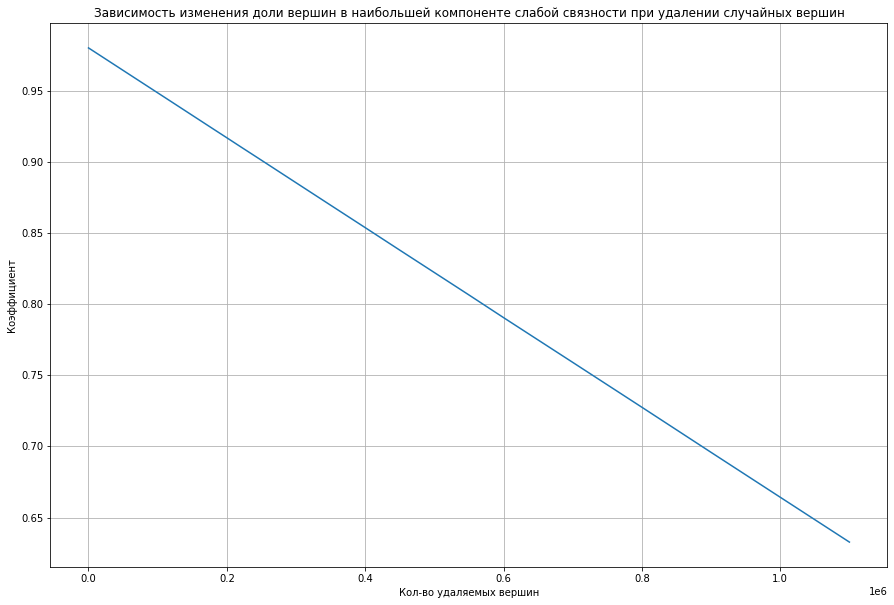

In [104]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 60000, 120000, 180000, 200000, 220000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 700000, 800000, 900000, 1000000, 1100000]
nodes_vk = set([*df["u"].unique(), *df["v"].unique()])
nodes_vk_len = len(nodes_vk)
node_proportions = []
for number in node_numbers_to_delete:
    nodes_to_delete_vk = random.sample(list(nodes_vk), k=number)
    proportion = len(set(max_component_vk) - set(nodes_to_delete_vk))/nodes_vk_len
    node_proportions.append(proportion)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Кол-во удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
plt.plot(node_numbers_to_delete, node_proportions)

удаляется x% узлов наибольшей степени

In [126]:
node_number_to_delete = 3
max_n_nodes = heapq.nlargest(node_number_to_delete, graph_nodes_degrees_test.items(), key=lambda item: len(item[1]))
print(graph_nodes_degrees_test)
print(max_n_nodes)
max_n_nodes = [node[0] for node in max_n_nodes]
print(max_n_nodes)

max_component_test_after_delete = set(max_component_test) - set(max_n_nodes)
print()
print(max_component_test_after_delete)

{1: {2, 3, 4, 5}, 2: {1, 3}, 3: {1, 2}, 4: {1, 5}, 5: {1, 4, 6}, 6: {5, 7}, 7: {8, 6}, 8: {7}, 10: {11, 13}, 11: {10, 13}, 13: {10, 11}, 68: {19}, 19: {68}, 999: {9}, 9: {999}}
[(1, {2, 3, 4, 5}), (5, {1, 4, 6}), (2, {1, 3})]
[1, 5, 2]

{3, 4, 6, 7, 8}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



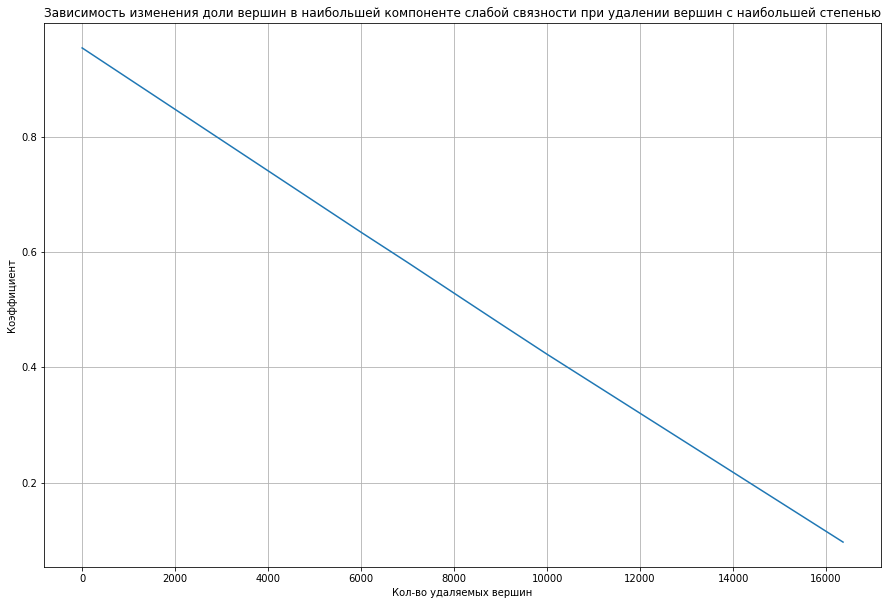

In [216]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364]
# node_numbers_to_delete = [2, 4, 8, 16]
node_proportions = []
for number in node_numbers_to_delete:
    max_n_nodes = heapq.nlargest(number, graph_nodes_degrees_astro.items(), key=lambda item: len(item[1]))
#     print(graph_nodes_degrees_astro)
#     print(max_n_nodes)
    max_n_nodes = [node[0] for node in max_n_nodes]
#     print(max_n_nodes)

#     max_component_astro_after_delete = set(max_component_astro) - set(max_n_nodes)
    proportion = len(set(max_component_astro) - set(max_n_nodes))/nodes_astro_len
    node_proportions.append(proportion)
#     print()
#     print(max_component_astro_after_delete)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
plt.xlabel("Кол-во удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
plt.plot(node_numbers_to_delete, node_proportions)

[0.9800767031623703, 0.9800760587604349, 0.9800747699565641, 0.9800721923488225, 0.9800670371333393, 0.980056726702373, 0.9800522158888252, 0.9800361058404403, 0.980012907370766, 0.9799948641165749, 0.9799758542594806, 0.9799323571288414, 0.9799123806688441, 0.9798840269836866, 0.9798479404753044, 0.9798108873640191, 0.9797870444924094, 0.9797474137733825, 0.9795940461127581, 0.9794174799824594, 0.9791107446612105, 0.9789496441773613, 0.9787576124006131, 0.9784663427258138, 0.9781441417581154, 0.977821940790417, 0.9774410992465975, 0.9771775388550202, 0.9768553378873218, 0.9748048509288892, 0.9607494781149826, 0.9414325634985612, 0.9221185486908492, 0.9156838731649447, 0.909247264433234, 0.8995912236322811, 0.8834940632860697, 0.8673904589205044]


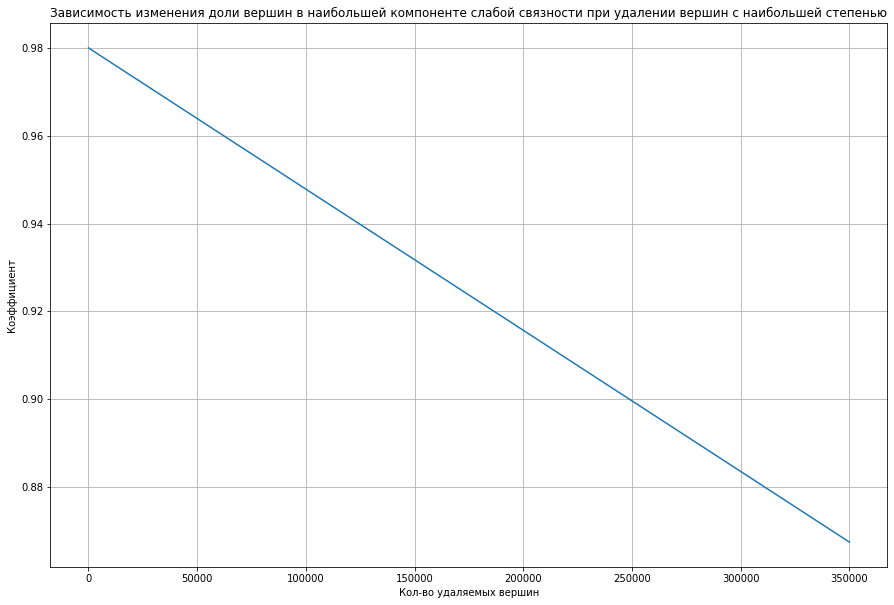

In [229]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 60000, 120000, 180000, 200000, 220000, 250000, 300000, 350000]
# node_numbers_to_delete = [2, 4, 8, 16]

nodes_vk = set([*df["u"].unique(), *df["v"].unique()])
nodes_vk_len = len(nodes_vk)

max_n_nodes_in_graph = heapq.nlargest(nodes_vk_len, graph_nodes_degrees_vk.items(), key=lambda item: len(item[1]))

node_proportions = []
for number in node_numbers_to_delete:
    max_n_nodes = [node[0] for node in max_n_nodes_in_graph[:number]]
    proportion = len(set(max_component_vk) - set(max_n_nodes))/nodes_vk_len
    node_proportions.append(proportion)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
plt.xlabel("Кол-во удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
plt.plot(node_numbers_to_delete, node_proportions)